In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None

# Data Cleaning and Exploration
- objective: to find trends in data in order to add more features to train a model with

In [2]:
# Read in data
df = pd.read_csv('EPL_Set_clean.csv')
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry City,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,Queens Park,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn Rovers,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Wednesday,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Manchester City,Leeds United,1,1,D,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...,...
9659,E0,13/05/18,Newcastle United,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,E0,13/05/18,Southampton,Manchester City,0,1,A,0.0,0.0,D,2017-18
9661,E0,13/05/18,Swansea City,Stoke City,1,2,A,1.0,2.0,A,2017-18
9662,E0,13/05/18,Tottenham Hotspur,Leicester City,5,4,H,1.0,2.0,A,2017-18


Column Abbreviations:
- Div: Division, unimportant as all matches in this dataset are from the same division (will delete in the next cell)
- Date: Date the match was played
- HomeTeam: The home team (the team hosting the game)
- AwayTeam: The away team (the team travelling to the host's stadium)
- FTHG: Full time home goals (number of goals scored by the home team by full time)
- FTAG: Full time away goals (number of goals scored by the away team by full time)
- FTR: Full time result (H = Home team win, D = Draw, A = Away team win)
- HTHG: Half time home goals (number of goals scored by the home team by half time)
- HTAG: Half time away goals (number of goals scored by the away team by half time)
- HTR: Half time result (H = Home team winning, D = Drawing, A = Away team winning)
- Season: The year the match was played

In [3]:
del df['Div']

Since complete data is only available from the '95 season onwards, I will be dropping data from the '93-'94 and '94-'95 seasons

In [4]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,19/08/95,Aston Villa,Manchester United,3,1,H,3.0,0.0,H,1995-96
1,19/08/95,Blackburn Rovers,Queens Park,1,0,H,1.0,0.0,H,1995-96
2,19/08/95,Chelsea,Everton,0,0,D,0.0,0.0,D,1995-96
3,19/08/95,Liverpool,Sheffield Wednesday,1,0,H,0.0,0.0,D,1995-96
4,19/08/95,Manchester City,Tottenham Hotspur,1,1,D,0.0,1.0,A,1995-96
...,...,...,...,...,...,...,...,...,...,...
8735,13/05/18,Newcastle United,Chelsea,3,0,H,1.0,0.0,H,2017-18
8736,13/05/18,Southampton,Manchester City,0,1,A,0.0,0.0,D,2017-18
8737,13/05/18,Swansea City,Stoke City,1,2,A,1.0,2.0,A,2017-18
8738,13/05/18,Tottenham Hotspur,Leicester City,5,4,H,1.0,2.0,A,2017-18


There is some inconsistency in the data that I have collected as some dates are recorded in the format DD/MM/YYYY, while some are in the format MM/DD/YYYY. Furthermore, some only have two digits to represent the year. To resolve this issue, I will convert all dates to DD/MM/YYYY format.

In [5]:
# convert date to DD/MM/YYYY for consistency
all_dates = []
for date in df['Date']:
    day = date.split('/')[0]
    month = date.split('/')[1]
    year = date.split('/')[2]
    
    #day
    if len(day) == 1:
        day = '0' + day
    
    #month
    if len(month) == 1:
        month = '0' + month
        
    #year
    if len(year)<=2:
        if int(year) > 20:
            year = '19' + year
        else:
            year = '20' + year
    
    full_date = day + '/' + month + '/' + year
    all_dates.append(full_date)

df['Date'] = all_dates

# Create datetime field so I can sort by ascending date
df['DateTime'] =pd.to_datetime(df.Date, dayfirst=True)

df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,DateTime
0,19/08/1995,Aston Villa,Manchester United,3,1,H,3.0,0.0,H,1995-96,1995-08-19
1,19/08/1995,Blackburn Rovers,Queens Park,1,0,H,1.0,0.0,H,1995-96,1995-08-19
2,19/08/1995,Chelsea,Everton,0,0,D,0.0,0.0,D,1995-96,1995-08-19
3,19/08/1995,Liverpool,Sheffield Wednesday,1,0,H,0.0,0.0,D,1995-96,1995-08-19
4,19/08/1995,Manchester City,Tottenham Hotspur,1,1,D,0.0,1.0,A,1995-96,1995-08-19
...,...,...,...,...,...,...,...,...,...,...,...
8735,13/05/2018,Newcastle United,Chelsea,3,0,H,1.0,0.0,H,2017-18,2018-05-13
8736,13/05/2018,Southampton,Manchester City,0,1,A,0.0,0.0,D,2017-18,2018-05-13
8737,13/05/2018,Swansea City,Stoke City,1,2,A,1.0,2.0,A,2017-18,2018-05-13
8738,13/05/2018,Tottenham Hotspur,Leicester City,5,4,H,1.0,2.0,A,2017-18,2018-05-13


It is useful to create a set of teams here for graphing (to act as the y axis labels)

In [6]:
team_list = pd.read_csv('teams.csv')

# Create a set of all teams
set_of_teams = []
for team in team_list['Team List']:
    set_of_teams.append(team)

I will now create a new binary feature in the dataframe to mark whether or not a game is in 'best games' list

In [7]:
best_games = pd.read_csv('best_games.csv')
best_games

,teamA,teamB,teamAGoals,teamBGoals,date
0,Chelsea,Tottenham Hotspur,2,2,02/05/2016
1,Newcastle United,Manchester United,5,0,20/10/1996
2,Leicester City,Arsenal,3,3,27/08/1997
3,Newcastle United,Arsenal,4,4,05/02/2011
4,Aston Villa,Manchester United,1,2,23/08/1993
...,...,...,...,...,...
91,Manchester United,Blackburn Rovers,2,3,31/12/2011
92,Blackburn Rovers,Burnley,3,2,18/10/2009
93,Sunderland,Chelsea,4,1,04/12/1999
94,Everton,Liverpool,3,3,23/11/2013


In [8]:
# Create datetime field so I can sort by ascending date
best_games['DateTime'] =pd.to_datetime(best_games.date, dayfirst=True)
best_games = best_games.sort_values(by='DateTime',ascending=True)

# Discard all games before August '95
date_range = best_games['DateTime'] >= '1995-08-01'
best_games = best_games.loc[date_range]

best_games = best_games.reset_index(drop=True)

best_games

,teamA,teamB,teamAGoals,teamBGoals,date,DateTime
0,Liverpool,Newcastle United,4,3,03/04/1996,1996-04-03
1,Manchester City,Liverpool,2,2,05/05/1996,1996-05-05
2,Newcastle United,Manchester United,5,0,20/10/1996,1996-10-20
3,Southampton,Manchester United,6,3,26/10/1996,1996-10-26
4,Newcastle United,Leicester City,4,3,02/02/1997,1997-02-02
...,...,...,...,...,...,...
81,Leicester City,Manchester United,5,3,21/09/2014,2014-09-21
82,Liverpool,Arsenal,3,3,13/01/2016,2016-01-13
83,Norwich City,Liverpool,4,5,23/01/2016,2016-01-23
84,Chelsea,Tottenham Hotspur,2,2,02/05/2016,2016-05-02


In [9]:
#print(best_games.head(10))
#print(df['Date'][1549-926])

i = 0
bg = []
for x in range(len(df)):
    bg.append(0)
df['Best Game'] = bg

for index, row in df.iterrows():
    if i >= len(best_games):
        break
    if best_games['DateTime'][i] - row['DateTime'] < timedelta(weeks=1): #some inconsistency in dates in data
        #print(best_games['date'][i][-7:])
        if row['HomeTeam'] == best_games['teamA'][i] or row['HomeTeam'] == best_games['teamB'][i]:
            if row['AwayTeam'] == best_games['teamA'][i] or row['AwayTeam'] == best_games['teamB'][i]:
                df['Best Game'][index] = 1
                i = i+1
    else:
        row['Best Game'] = 0


target = df['Best Game'] == 1
test = df[target]
test

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,DateTime,Best Game
320,03/04/1996,Liverpool,Newcastle United,4,3,H,1.0,2.0,A,1995-96,1996-04-03,1
374,04/05/1996,Manchester City,Liverpool,2,2,D,0.0,2.0,A,1995-96,1996-05-04,1
478,20/10/1996,Newcastle United,Manchester United,5,0,H,2.0,0.0,H,1996-97,1996-10-20,1
484,26/10/1996,Southampton,Manchester United,6,3,H,3.0,1.0,H,1996-97,1996-10-26,1
623,02/02/1997,Newcastle United,Leicester City,4,3,H,1.0,0.0,H,1996-97,1997-02-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7267,21/09/2014,Leicester City,Manchester United,5,3,H,1.0,2.0,A,2014-15,2014-09-21,1
7804,13/01/2016,Liverpool,Arsenal,3,3,D,2.0,2.0,D,2015-16,2016-01-13,1
7823,23/01/2016,Norwich City,Liverpool,4,5,A,2.0,1.0,H,2015-16,2016-01-23,1
7955,02/05/2016,Chelsea,Tottenham Hotspur,2,2,D,0.0,2.0,A,2015-16,2016-05-02,1


### Hypothesis 1: more popular/successful teams appear in the 'best games' set at higher rates

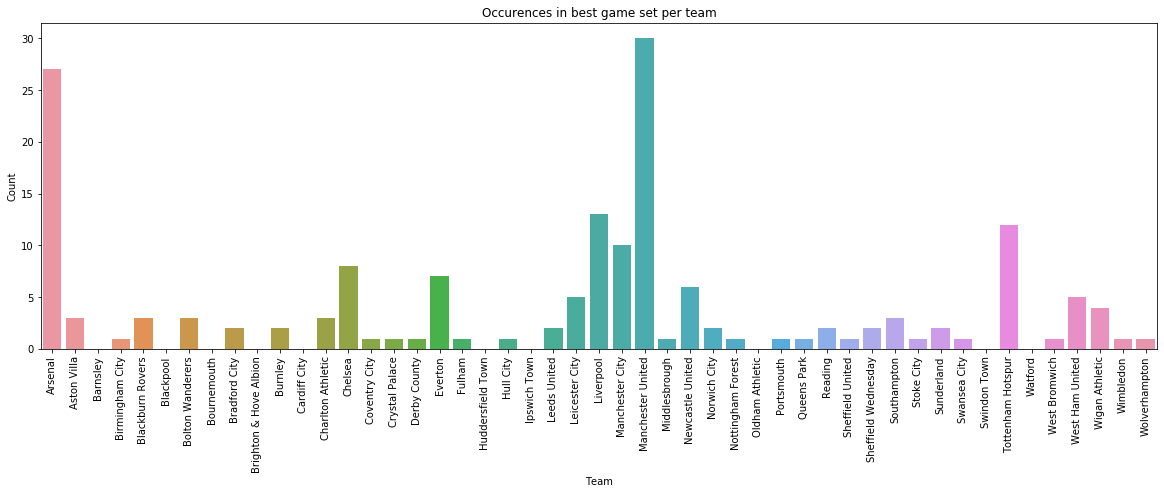

In [10]:
# Find most popular teams
team_count = best_games['teamA'].tolist() + best_games['teamB'].tolist()
count = []
for team in set_of_teams:
    occurences = team_count.count(team)
    count.append(occurences)

# Graph number of times a team is a part of a 'best game'
plt.figure(figsize=(20,6))
plt.title("Occurences in best game set per team")
sns.barplot(x=set_of_teams, y=count)
plt.xlabel("Team")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()

From the graph above, it seems as though the more popular/successful teams appear in the 'best games' set more often, confirming my hypothesis. The three teams with the highest count - Manchester United, Arsenal, and Liverpool - are three of most successful teams in Premier League history. I believe that this makes sense for the following reasons:
1. More successful teams tend to play in more high-stake games (games that have a large impact on the outcome of that year's premier league title race)
2. More successful teams tend to have higher viewership numbers for their games (more neutrals/rivals watch their games, and they usually have larger fanbases) and thus their games are more likely to remain in the collective memories of football fans for longer
3. More successful teams attract the most skillful players who produce the most highlight reel worthy moments, making their games more memorable
4. More successful teams are more likely to have more years in the premier league (3 teams get relegated to lower league divisions every year) and thus they play more premier league games, increasing their odds of playing in a memorable game

I believe that it would be beneficial to reflect the findings from this hypothesis in the data. I think the best way to represent the popularity/success of the teams playing in each game would be to give each team a score to represent their success in the premier league, and the 'popularity score' of each game would be the sum of the two team's popularity scores. I will make the assumption here that the most successful teams are the most popular, and the metric I will use to determine the popularity score is the total number of points the team has earned in Premier League history (Teams earn 3 points for each match won, 1 for each draw, and 0 for losses). The data will be scraped from [this wikipedia page](https://en.wikipedia.org/wiki/Premier_League_records_and_statistics).

In [11]:
points_total = pd.read_csv('points_history.csv')
print(points_total.head())
print('\n')
print(points_total.tail())

               Teams  Total Points
0  Manchester United          2168
1            Arsenal          1955
2            Chelsea          1931
3          Liverpool          1849
4  Tottenham Hotspur          1595


                Teams  Total Points
44      Bradford City            62
45  Huddersfield Town            53
46          Blackpool            39
47           Barnsley            35
48       Swindon Town            30


In [12]:
# Normalize point totals to (0,1], create dictionary mapping teams to points
max_value = points_total['Total Points'][0]
points_total['Total Points'] = points_total['Total Points']/max_value

points_dict = {}
for index, row in points_total.iterrows():
    points_dict[row['Teams']] = row['Total Points']

In [13]:
# Calculate total 'popularity score' of each game
pop_score = []
for index, game in df.iterrows():
    score = points_dict[game['HomeTeam']] + points_dict[game['AwayTeam']]
    pop_score.append(score)
df['Popularity Score'] = pop_score
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,DateTime,Best Game,Popularity Score
0,19/08/1995,Aston Villa,Manchester United,3,1,H,3.0,0.0,H,1995-96,1995-08-19,0,1.564114
1,19/08/1995,Blackburn Rovers,Queens Park,1,0,H,1.0,0.0,H,1995-96,1995-08-19,0,0.589483
2,19/08/1995,Chelsea,Everton,0,0,D,0.0,0.0,D,1995-96,1995-08-19,0,1.548893
3,19/08/1995,Liverpool,Sheffield Wednesday,1,0,H,0.0,0.0,D,1995-96,1995-08-19,0,1.033672
4,19/08/1995,Manchester City,Tottenham Hotspur,1,1,D,0.0,1.0,A,1995-96,1995-08-19,0,1.367159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,13/05/2018,Newcastle United,Chelsea,3,0,H,1.0,0.0,H,2017-18,2018-05-13,0,1.477399
8736,13/05/2018,Southampton,Manchester City,0,1,A,0.0,0.0,D,2017-18,2018-05-13,0,1.059502
8737,13/05/2018,Swansea City,Stoke City,1,2,A,1.0,2.0,A,2017-18,2018-05-13,0,0.354705
8738,13/05/2018,Tottenham Hotspur,Leicester City,5,4,H,1.0,2.0,A,2017-18,2018-05-13,0,1.015683


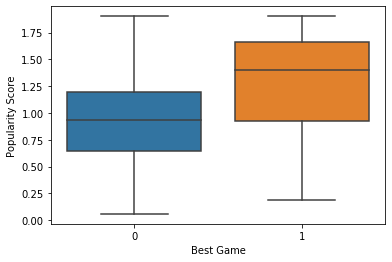

In [14]:
sns.boxplot(x = 'Best Game', y = 'Popularity Score', data = df)
plt.show()

As can be seen from the box and whisker plot above, the median popularity score for games in the 'best games' set is much higher than games not in the set, proving that memorable games involve successful/popular teams more often than not.

**Verdict: Correct**

### Hypothesis 2: rival games appear in the 'best games' set at higher rates

A list of premier league rivalries was scraped from [this wikipedia link](https://en.wikipedia.org/wiki/List_of_sports_rivalries_in_the_United_Kingdom) and stored in the file 'rivalries.csv'. I will create a dictionary of each teams rivals (if any) and examine what proportion of the 'best games' set involves rival games.

In [15]:
# create list of list of rivalries
f = open('rivalries.csv','r')
reader = csv.reader(f)
riv = []
for row in reader:
    riv.append(row)

# create dictionary of rivalries (key: team name, value: set of rivals)
rivals = {}
for rival_group in riv:
    for team in rival_group:
        for enemy in rival_group:
            if enemy != team:
                rivals.setdefault(team, set()).add(enemy)
                
# add new binary feature to dataset (0 = not rival game, 1 = rival game)
riv_list = []
for index, row in df.iterrows():
    val = 0
    if row['HomeTeam'] in rivals:
        if row['AwayTeam'] in rivals[row['HomeTeam']]:
            val = 1
    riv_list.append(val)

df['Rival Game'] = riv_list

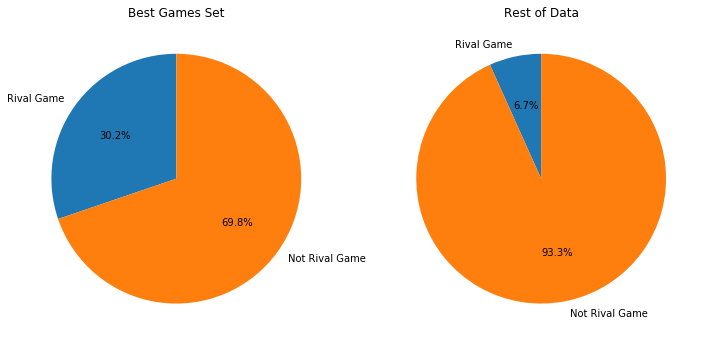

Number of rival games in best games set:  26
Number of non-rival games in best games set:  60
Number of rival games in rest of data:  582
Number of non-rival games in rest of data:  8072


In [16]:
#pie chart of % rivalries
prove_best = np.logical_and(df['Best Game'] == 1, df['Rival Game'] == 1)
disprove_best = np.logical_and(df['Best Game'] == 1, df['Rival Game'] == 0)
prove_rest = np.logical_and(df['Best Game'] == 0, df['Rival Game'] == 1)
disprove_rest = np.logical_and(df['Best Game'] == 0, df['Rival Game'] == 0)

prove_table_1 = df[prove_best]
disprove_table_1 = df[disprove_best]
prove_table_2 = df[prove_rest]
disprove_table_2 = df[disprove_rest]

labels = ['Rival Game', 'Not Rival Game']
best = [len(prove_table_1), len(disprove_table_1)]
rest = [len(prove_table_2), len(disprove_table_2)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes[0].pie(best, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
axes[0].set_title("Best Games Set")
axes[1].pie(rest, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
axes[1].set_title("Rest of Data")
fig.tight_layout()

plt.show()

print('Number of rival games in best games set: ',len(prove_table_1))
print('Number of non-rival games in best games set: ',len(disprove_table_1))
print('Number of rival games in rest of data: ',len(prove_table_2))
print('Number of non-rival games in rest of data: ',len(disprove_table_2))

As can be seen from the pie chart above, the proportion of rival games in the 'Best Games' set is much greater than the proportion of rival games in the rest of the data. This may be because there is extra emotional significance when it comes to games in which a team beats their fierce rivals, making the games more memorable. Rival games could possible also receive more media coverage, and higher viewership numbers mean that rival games are more likely to leave a greater impression on football audiences as a whole.

In terms of absolute numbers, there are a lot more rival games not in the 'Best Games' set than there are in the rest of the data. A possible reason for this may be because when teams play in rival games, there is a lot more to lose (more pride at stake). As a result, teams may play extra cautiously in order not to lose the game. Defensive football rarely results in highlights or memorable plays and as a result the game as a whole is not memorable and not worthy of the 'Best Games' title. 

**Verdict: Correct**

### Hypothesis 3: games in which a comeback win occurred appear in the 'best games' set at higher rates

The dataframe includes two columns that describe the score at half time (HTR) and the score at full time (FTR). I will be defining a comeback as a game in which the team losing at half time wins the game. I hypothesize that comeback games are more memorable than regular games because of the emotional rollercoasters that fans go through when watching these games.

In [17]:
# I will first change the H, D, and A values in the table to 1,0, and -1 respectively
df["HTR"] = df.HTR.replace(
    {
        'H':1,
        'D':0,
        'A':-1
    })
df["FTR"] = df.FTR.replace(
    {
        'H':1,
        'D':0,
        'A':-1
    })

In [18]:
# Comeback games are games in which HTR = 1 and FTR = -1 or HTR = -1 and FTR = 1
comeback = []

for index, row in df.iterrows():
    if np.logical_or(np.logical_and(row['HTR']==-1,row['FTR']==1),np.logical_and(row['HTR']==1,row['FTR']==-1)):
        comeback.append(1)
    else:
        comeback.append(0)

df['Comeback'] = comeback

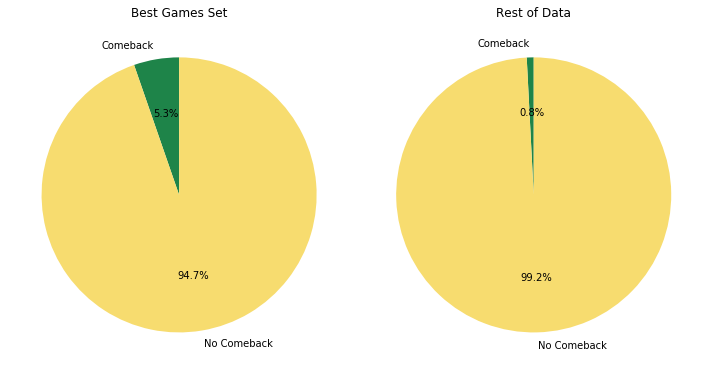

Number of comeback games in best games set:  18
Number of non-comeback games in best games set:  68
Number of comeback games in rest of data:  321
Number of non-comeback games in rest of data:  8333


In [19]:
#pie chart of comebacks
N = 2
cb_best = np.logical_and(df['Best Game'] == 1, df['Comeback'] == 1)
ncb_best = np.logical_and(df['Best Game'] == 1, df['Comeback'] == 0)
cb_rest = np.logical_and(df['Best Game'] == 0, df['Comeback'] == 1)
ncb_rest = np.logical_and(df['Best Game'] == 0, df['Comeback'] == 0)
cb_best_table = df[cb_best]
ncb_best_table = df[ncb_best]
cb_rest_table = df[cb_rest]
ncb_rest_table = df[ncb_rest]

labels = ['Comeback', 'No Comeback']
cb = [len(cb_best_table),len(cb_rest_table)]
ncb = [len(ncb_best_table),len(ncb_rest_table)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
colors = ['#1E8449', '#F7DC6F']
axes[0].pie(cb, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)
axes[0].set_title("Best Games Set")
axes[1].pie(ncb, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)
axes[1].set_title("Rest of Data")
fig.tight_layout()

plt.show()

print('Number of comeback games in best games set: ',len(cb_best_table))
print('Number of non-comeback games in best games set: ',len(ncb_best_table))
print('Number of comeback games in rest of data: ',len(cb_rest_table))
print('Number of non-comeback games in rest of data: ',len(ncb_rest_table))

As shown in the chart above, my hypothesis was correct in that comeback wins do appear in the 'best games' set at higher rates. However, it is important to note that the proportion of comeback games in the 'Best Games' set is quite small. A reason for this could be that comebacks are rare, and there are other more significant elements of a game that make it memorable. Furthermore, there is also variance between comebacks. A team is much more likely to come back from one goal down than they are to come back from three goals down (which would make the game much more memorable than a one goal comeback).

**Verdict: Correct, but not statistically significant**

### Hypothesis 4: high scoring games appear in the 'best games' set at higher rates

Football has traditionally been a low scoring game, especially in comparison to other popular sports such as basketball. As a result, high scoring games are often more memorable to fans. I will be creating a new column the dataframe to keep track of the number of goals scored in each game.

In [20]:
total_goals = []

for index, row in df.iterrows():
    total_goals.append(row['FTHG'] + row['FTAG'])

df['Total Goals'] = total_goals

In [21]:
num_goals = df['Total Goals'].unique()
num_goals.sort()
print(num_goals)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


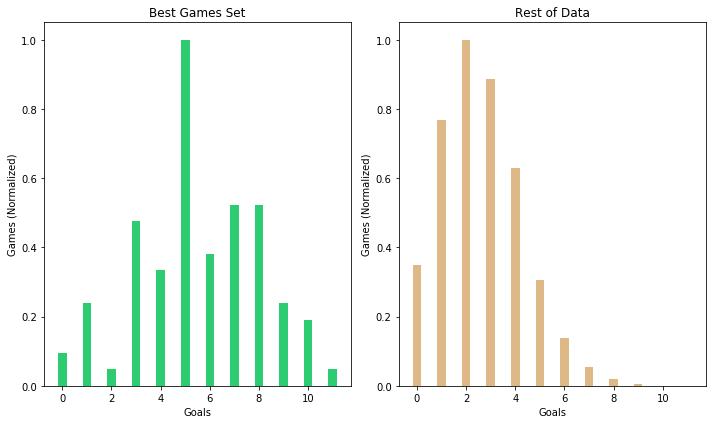

                          0     1     2     3     4    5    6    7   8   9   \
Best Games (absolute)      2     5     1    10     7   21    8   11  11   5   
Rest of Data (absolute)  726  1598  2082  1843  1313  637  285  115  43  11   

                         10  11  
Best Games (absolute)     4   1  
Rest of Data (absolute)   1   0  


In [22]:
N = 12
best = [None] * 12
rest = [None] * 12

target_best = df['Best Game'] == 1
best_set = df[target_best]
best_set_list = best_set['Total Goals'].values.tolist()
target_rest = df['Best Game'] == 0
rest_set = df[target_rest]
rest_set_list = rest_set['Total Goals'].values.tolist()

for x in range(12):
    best[x] = best_set_list.count(x)
    rest[x] = rest_set_list.count(x)
    
max_best = max(best)
max_rest = max(rest)

best_norm = [x/max_best for x in best]
rest_norm = [x/max_rest for x in rest]
  
ind = np.arange(N)
width = 0.35
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes[0].bar(ind, best_norm, width, color='#2ECC71')
axes[0].set_title("Best Games Set")
axes[0].set_ylabel('Games (Normalized)')
axes[0].set_xlabel('Goals')
axes[1].bar(ind, rest_norm, width, color='burlywood')
axes[1].set_title("Rest of Data")
axes[1].set_ylabel('Games (Normalized)')
axes[1].set_xlabel('Goals')
fig.tight_layout()

plt.show()

combined = [best, rest]
results = pd.DataFrame(columns=num_goals, data=combined)
results.index = ['Best Games (absolute)', 'Rest of Data (absolute)']
print(results)

From the figures above, we can come to several conclusions:
- The 'Rest of Data' set is positively skewed while the 'Best Games' set is more normally distributed.
- Only a small portion of games (9%) in the 'Best Games' set involve low numbers of goals ([low defined as less than the average number of goals scored during a football match, which is 2.6](https://www.statista.com/statistics/269031/goals-scored-per-game-at-the-fifa-world-cup-since-1930/#:~:text=FIFA%20soccer%20World%20Cup%3A%20Average,scored%20per%20games%201930%2D2018&text=At%20the%20latest%20World%20Cup,of%202.6%20goals%20per%20game.)).
    - Only ~2% of games involve 0 goals.
- The mode of the 'Best Games' set (5) is much greater than the mode of the 'Rest of Data' set (2). This suggests that the 'Best Games' are typically high scoring. The mode is almost double the average number of goals scored in an football match.
- A larger proportion of total goals scored in the 'Best Games' set are in the higher end of the range, suggesting that more often than not, 'Best Games' are high scoring games
    - The absolute number of games in the 'Best Games' set with 10 or more goals is 5 compared to 1 in the rest of the data, even though the ratio of the number of games in the 'Best Games' set to the number of games in the rest of the data is 8654:86

**Verdict: Correct**

### Hypothesis 5: close games appear in the 'best games' set at higher rates

To measure this statistic, I will be calculating the goal difference of each game (goals scored by winner - goals scored by loser). Drawn games have a goal difference of 0.

In [23]:
goal_diff = []

for index, row in df.iterrows():
    diff = abs(int(row['FTHG']) - int(row['FTAG']))
    goal_diff.append(diff)

df['Goal Difference'] = goal_diff

In [24]:
unique_goal_diff = df['Goal Difference'].unique()
unique_goal_diff.sort()
print(unique_goal_diff)

[0 1 2 3 4 5 6 7 8]


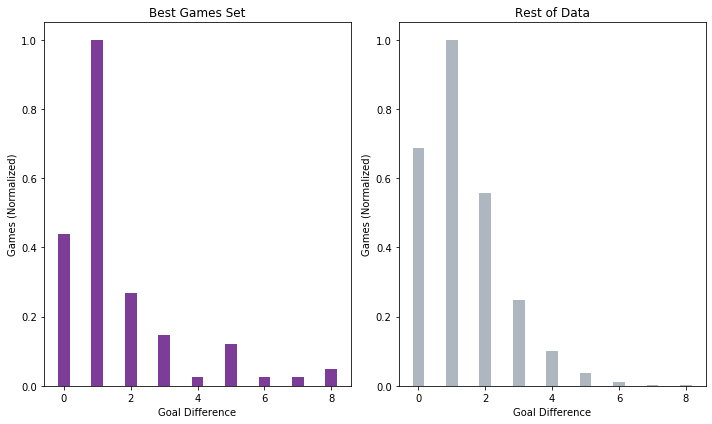

                            0     1     2    3    4    5   6  7  8
Best Games (absolute)      18    41    11    6    1    5   1  1  2
Rest of Data (absolute)  2252  3273  1825  807  333  117  37  7  3


In [25]:
N = 9
best = [None] * 9
rest = [None] * 9

target_best = df['Best Game'] == 1
best_set = df[target_best]
best_set_list = best_set['Goal Difference'].values.tolist()
target_rest = df['Best Game'] == 0
rest_set = df[target_rest]
rest_set_list = rest_set['Goal Difference'].values.tolist()

for x in range(9):
    best[x] = best_set_list.count(x)
    rest[x] = rest_set_list.count(x)
    
max_best = max(best)
max_rest = max(rest)

best_norm = [x/max_best for x in best]
rest_norm = [x/max_rest for x in rest]
  
ind = np.arange(N)
width = 0.35
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes[0].bar(ind, best_norm, width, color='#7D3C98')
axes[0].set_title("Best Games Set")
axes[0].set_ylabel('Games (Normalized)')
axes[0].set_xlabel('Goal Difference')
axes[1].bar(ind, rest_norm, width, color='#AEB6BF')
axes[1].set_title("Rest of Data")
axes[1].set_ylabel('Games (Normalized)')
axes[1].set_xlabel('Goal Difference')
fig.tight_layout()

plt.show()

combined = [best, rest]
results = pd.DataFrame(columns=unique_goal_diff, data=combined)
results.index = ['Best Games (absolute)', 'Rest of Data (absolute)']
print(results)

Both graphs are positively skewed. The mode of the 'Best Games' set is 1 goal, which suggests that a large proportion of the 'Best Games' were close games (the winning team won by one goal). However, as can be seen from the rest of the data, the majority of the games have a goal difference of one so the large number of games with a goal diffrence of one in the 'Best Games' set could just be due to a large sample size. The proportion of games with a goal difference of one in the 'Best Games' set (48%) is greater than it's counterpart in the rest of the data (38%), which suggests that my hypothesis is correct to a degree, although the two factors (appearance in 'Best Games' set, small goal difference) may not be strongly correlated.

**Verdict: Correct, but not statistically significant**

### Hypothesis 6: games played closer to the end of the season appear in the 'best games' set at higher rates

Some Premier League games matter more than others. Games played towards the end of the season can have a large impact on the league table because at the latter stages of the season, players become fatigued both mentally and physically, so results at this stage can have a large impact on the morale of players. These games are more high-stakes as a result and can be more memorable. Furthermore, results at this stage can mathematically confirm a team's place in the league table (confirmed as champions, confirmed spot in European competition, confirmed relegation, etc.) and the fate of their rivals or teams close to them in the table, which can have a major emotional and financial impact on all relevant teams. As a Manchester United fan, Manchester City's 3-2 win over QPR in the final game of the 2011-12 season to win the premier league comes to mind.

Premier league seasons are played from August to May. Each of these seasons will be assigned a number from 0 (August) to 9 (May)

In [26]:
month_dict = {'08':0, '09':1, '10':2, '11':3, '12':4, '01':5, '02':6, '03':7, '04':8, '05':9}
month_of_game = []

for index, row in df.iterrows():
    date = row['Date']
    month = date.split('/')[1]
    val = month_dict[month]
    month_of_game.append(val)

df['Month'] = month_of_game

0: Aug, 1: Sep, 2: Oct, 3: Nov, 4: Dec, 5: Jan, 6: Feb, 7: Mar, 8: Apr, 9: May


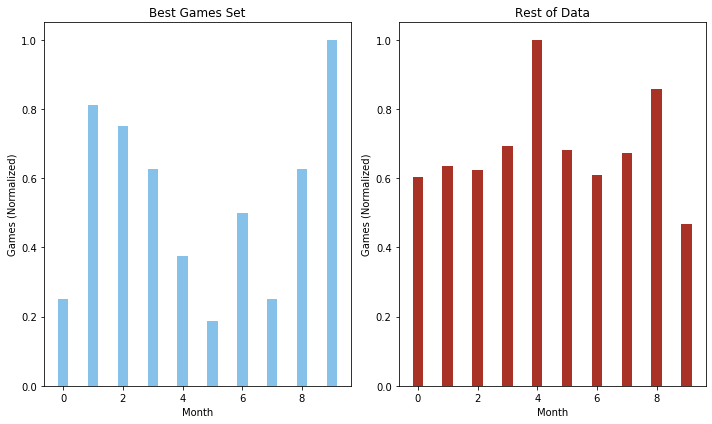

                           0    1    2    3     4    5    6    7     8    9
Best Games (absolute)      4   13   12   10     6    3    8    4    10   16
Rest of Data (absolute)  762  805  790  876  1265  862  770  850  1083  591


In [27]:
label = list(month_dict.values())
print('0: Aug, 1: Sep, 2: Oct, 3: Nov, 4: Dec, 5: Jan, 6: Feb, 7: Mar, 8: Apr, 9: May')

N = 10
best = [None] * 10
rest = [None] * 10

target_best = df['Best Game'] == 1
best_set = df[target_best]
best_set_list = best_set['Month'].values.tolist()
target_rest = df['Best Game'] == 0
rest_set = df[target_rest]
rest_set_list = rest_set['Month'].values.tolist()

for x in range(10):
    best[x] = best_set_list.count(x)
    rest[x] = rest_set_list.count(x)
    
max_best = max(best)
max_rest = max(rest)

best_norm = [x/max_best for x in best]
rest_norm = [x/max_rest for x in rest]
  
ind = np.arange(N)
width = 0.35
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes[0].bar(ind, best_norm, width, color='#85C1E9')
axes[0].set_title("Best Games Set")
axes[0].set_ylabel('Games (Normalized)')
axes[0].set_xlabel('Month')
axes[1].bar(ind, rest_norm, width, color='#A93226')
axes[1].set_title("Rest of Data")
axes[1].set_ylabel('Games (Normalized)')
axes[1].set_xlabel('Month')
fig.tight_layout()

plt.show()

combined = [best, rest]
results = pd.DataFrame(columns=label, data=combined)
results.index = ['Best Games (absolute)', 'Rest of Data (absolute)']
print(results)

The mode of the 'Best Games' data is 9 (May), suggesting that a large proportion of 'Best Games' (~19%) are played towards the end of the season. The data is distributed bimodally, suggesting that my hypothesis is not quite correct. It appears that the 'Best Games' are predominantly occur near the beginning and end of the season. This data surprises me a little as I would have expected more 'Best Games' to occur in December (4). This is because firstly, more games are played in December, and secondly, a lot of big games (games starring high profile rivals) are played during the festive season to capitalize on the fact that there are more viewers and thus more revenue potential. An explanation for this could be that since December has the most games played, perform below their best due to accumulated fatigue.

**Verdict: Disproved**
- 'Best Games' occur predominantly near the beginning and the end of the season

In [28]:
# Move target variable to front of dataframe
target = df['Best Game']
df.drop(labels=['Best Game'], axis=1,inplace = True)
df.insert(0, 'Best Game', target)
df

,Best Game,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,DateTime,Popularity Score,Rival Game,Comeback,Total Goals,Goal Difference,Month
0,0,19/08/1995,Aston Villa,Manchester United,3,1,1,3.0,0.0,1,1995-96,1995-08-19,1.564114,0,0,4,2,0
1,0,19/08/1995,Blackburn Rovers,Queens Park,1,0,1,1.0,0.0,1,1995-96,1995-08-19,0.589483,0,0,1,1,0
2,0,19/08/1995,Chelsea,Everton,0,0,0,0.0,0.0,0,1995-96,1995-08-19,1.548893,0,0,0,0,0
3,0,19/08/1995,Liverpool,Sheffield Wednesday,1,0,1,0.0,0.0,0,1995-96,1995-08-19,1.033672,0,0,1,1,0
4,0,19/08/1995,Manchester City,Tottenham Hotspur,1,1,0,0.0,1.0,-1,1995-96,1995-08-19,1.367159,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,0,13/05/2018,Newcastle United,Chelsea,3,0,1,1.0,0.0,1,2017-18,2018-05-13,1.477399,0,0,3,3,9
8736,0,13/05/2018,Southampton,Manchester City,0,1,-1,0.0,0.0,0,2017-18,2018-05-13,1.059502,0,0,1,1,9
8737,0,13/05/2018,Swansea City,Stoke City,1,2,-1,1.0,2.0,-1,2017-18,2018-05-13,0.354705,0,0,3,1,9
8738,0,13/05/2018,Tottenham Hotspur,Leicester City,5,4,1,1.0,2.0,-1,2017-18,2018-05-13,1.015683,0,1,9,1,9


In [29]:
# Export Dataframe
df.to_csv('EPL_model_ready.csv', index=False, encoding='utf-8')

This concludes the data cleaning and exploration portion of the project. In this section, I added 8 additional features to the dataframe and based on 6 hypotheses that I had, of which 4 were correct. In the next section, I will use machine learning techniques to create a list of recommended games to watch.